<a href="https://colab.research.google.com/github/asillymind22/AI/blob/main/RNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np

In [ ]:
(X_train,Y_train),(x_test,y_test)= mnist.load_data()
x=x_test

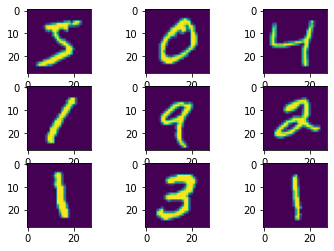

In [ ]:
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
print("X_train shape",X_train.shape)
X_train=X_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
print("X_train shape",X_train.shape)
X_train=X_train.astype('float32')
x_test=x_test.astype('float32')

X_train/=255
x_test/=255

X_train shape (60000, 28, 28)
X_train shape (60000, 784)


In [ ]:
print("Y_train shape",Y_train.shape)
Y_train=to_categorical(Y_train,10)
y_test=to_categorical(y_test,10)
print(y_test.shape)

Y_train shape (60000,)
(10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(1024, activation ='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

history= model.fit(X_train,Y_train,batch_size=128,epochs=30,verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.2269 - accuracy: 0.9295 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.1101 - val_accuracy: 0.9671
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9792 - val_loss: 0.0758 - val_accuracy: 0.9795
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.0760 - val_accuracy: 0.9810
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0739 - val_accuracy: 0.9825
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0831 - val_accuracy: 0.9815
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0339 - accuracy: 0.9903 - val_loss: 0.0743 - val_accuracy: 0.9840
Epoch 

In [ ]:
model.save('final_mnist.h5')
score = model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1723 - accuracy: 0.9833


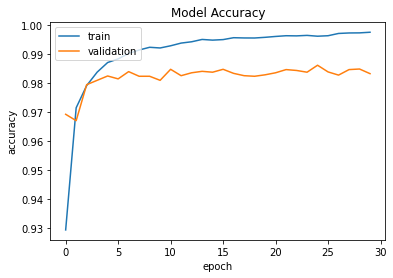

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

<function matplotlib.pyplot.show>

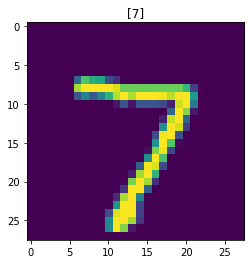

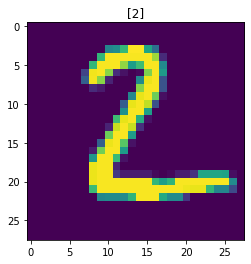

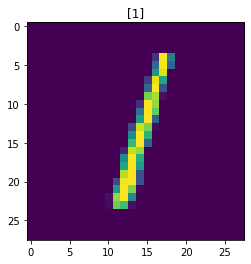

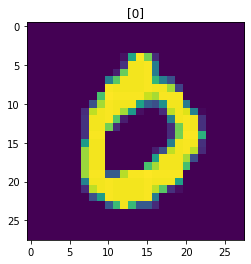

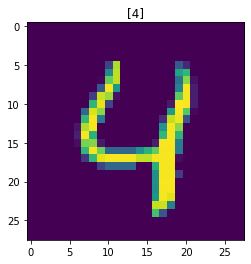

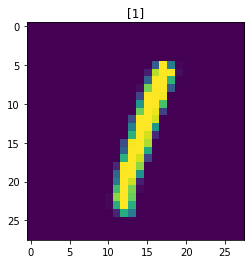

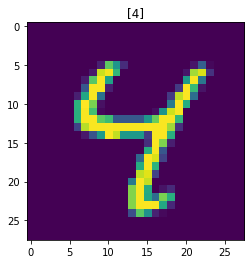

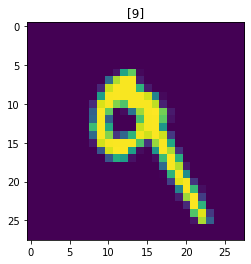

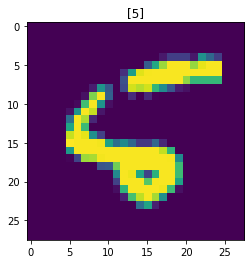

In [ ]:
pre_img=x.reshape(10000,784)
pre_img=pre_img.astype('float32')/255.0

y_pre = model.predict(pre_img)

for i in range (9):
  pre=y_pre[i]
  indices = np.where(pre == pre.max())[0]
  plt.figure(i)
  plt.title(str(indices))
  plt.imshow(x[i])
plt.show